<a href="https://colab.research.google.com/github/lilianapayares16-droid/BASE-CCVM-2024/blob/main/An%C3%A1lisis_exploratorio_y_modelado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TFM - Identificación del Riesgo Cardiovascular Mediante la Aplicación de Redes Neuronales

In [10]:
# Librerías base
import numpy as np
import pandas as pd
from IPython.display import display


# Para Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Para el modelado - Preprocesamiento
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import (confusion_matrix, classification_report, roc_auc_score,
                             RocCurveDisplay)

# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

sns.set_context("notebook")


In [11]:
import pandas as pd

df = pd.read_excel("BASE CCVM 2024.xlsx")

df.head()


,id_usuario,fecha_nacimiento,edad,sexo,curso_vida,pertenencia_etnica,grupo_poblacional,Discapacidad,pais,departamento,...,dosis_dialisis_dpb,vacuna_hepatitisb,homoglobina,albumina_serica,fosforo,valoracion_nefrologia,contraindicacion_vih,contraindicacion_vhc,contraindicacion_inmunologica,contraindicacion_pulmonar
0,1,1984-05-17,41,M,Adultez,Ninguna,Discapacidad,Multiple,Colombia,CÓRDOBA,...,0,4,12.5,3.81,5.93,2,2,2,2,2
1,2,1942-05-24,83,M,Vejez,Negro,Otros,Sin discapacidad,Colombia,CÓRDOBA,...,0,6,11.0,3.00,3.84,1,2,2,2,2
2,3,1977-09-10,47,F,Adultez,Ninguna,Otros,Sin discapacidad,Colombia,CÓRDOBA,...,0,4,10.0,4.13,4.22,1,2,2,2,2
3,4,1931-01-29,94,M,Vejez,Ninguna,Otros,Sin discapacidad,Colombia,CÓRDOBA,...,0,0,12.6,0.00,3.72,0,0,0,0,0
4,5,1935-12-31,89,F,Vejez,Ninguna,Otros,Sin discapacidad,Colombia,CÓRDOBA,...,0,0,12.0,4.50,0.00,0,0,0,0,0


In [12]:
## Fase I — Análisis Exploratorio (EDA)
print("Filas, columnas:", df.shape)
display(df.sample(5, random_state=42))

display(df.info())
display(df.describe(include="all").T.head(20))


Filas, columnas: (7341, 56)


,id_usuario,fecha_nacimiento,edad,sexo,curso_vida,pertenencia_etnica,grupo_poblacional,Discapacidad,pais,departamento,...,dosis_dialisis_dpb,vacuna_hepatitisb,homoglobina,albumina_serica,fosforo,valoracion_nefrologia,contraindicacion_vih,contraindicacion_vhc,contraindicacion_inmunologica,contraindicacion_pulmonar
5561,5562,1955-08-11,69,F,Vejez,Ninguna,Otros,Sin discapacidad,Colombia,CÓRDOBA,...,0,0,0.0,0.0,0.0,0,2,2,2,2
2627,2628,1991-04-03,34,F,Adultez,Ninguna,Otros,Sin discapacidad,Colombia,CÓRDOBA,...,0,0,0.0,0.0,0.0,0,0,0,0,0
457,458,1957-08-28,67,M,Vejez,Ninguna,Otros,Sin discapacidad,Colombia,CÓRDOBA,...,0,0,0.0,0.0,0.0,0,0,0,0,0
2995,2996,1970-01-02,55,F,Adultez,Ninguna,Otros,Sin discapacidad,Colombia,CÓRDOBA,...,0,0,0.0,0.0,0.0,0,0,0,0,0
5351,5352,1967-09-06,57,M,Adultez,Ninguna,Otros,Sin discapacidad,Colombia,CÓRDOBA,...,0,0,0.0,0.0,0.0,0,2,2,2,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7341 entries, 0 to 7340
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   id_usuario                     7341 non-null   int64         
 1   fecha_nacimiento               7341 non-null   datetime64[ns]
 2   edad                           7341 non-null   int64         
 3   sexo                           7341 non-null   object        
 4   curso_vida                     7341 non-null   object        
 5   pertenencia_etnica             7341 non-null   object        
 6   grupo_poblacional              7341 non-null   object        
 7   Discapacidad                   7341 non-null   object        
 8   pais                           7341 non-null   object        
 9   departamento                   7341 non-null   object        
 10  municipio_divipola             7341 non-null   int64         
 11  municipio_residen

None

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
id_usuario,7341.0,NaN,NaN,NaN,3667.215366,0.0,1830.0,3667.0,5504.0,7341.0,2121.36278
fecha_nacimiento,7341,NaN,NaN,NaN,1959-12-20 21:46:24.961176960,1922-01-05 00:00:00,1952-04-03 00:00:00,1958-10-24 00:00:00,1967-09-25 00:00:00,2010-12-01 00:00:00,NaN
edad,7341.0,NaN,NaN,NaN,65.062934,18.0,57.0,66.0,73.0,103.0,11.542877
sexo,7341,2,F,4039,NaN,NaN,NaN,NaN,NaN,NaN,NaN
curso_vida,7341,4,Vejez,5110,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pertenencia_etnica,7341,3,Ninguna,7303,NaN,NaN,NaN,NaN,NaN,NaN,NaN
grupo_poblacional,7341,3,Otros,7310,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Discapacidad,7341,3,Sin discapacidad,7331,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pais,7341,1,Colombia,7341,NaN,NaN,NaN,NaN,NaN,NaN,NaN
departamento,7341,1,CÓRDOBA,7341,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Valores nulos
missing = (df.isna().mean()*100).sort_values(ascending=False)
missing = missing[missing > 0]

if missing.empty:
    print("No se identificaron valores faltantes en la base de datos.")
else:
    plt.figure()
    missing.head(20).plot(kind="bar")
    plt.title("% de valores faltantes (top 20)")
    plt.ylabel("%")
    plt.show()



No se identificaron valores faltantes en la base de datos.


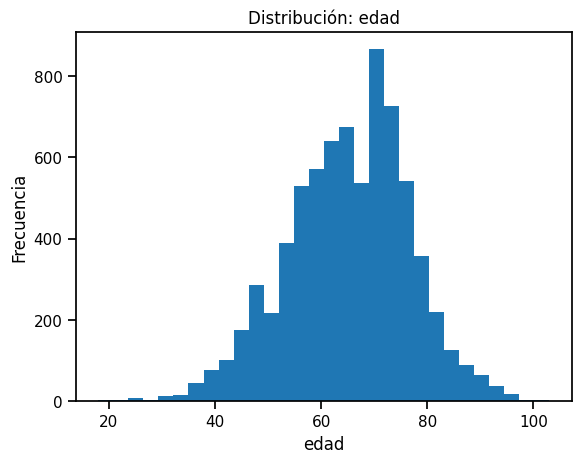

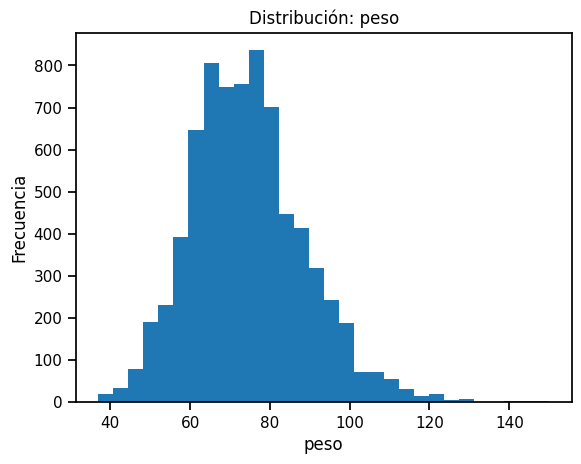

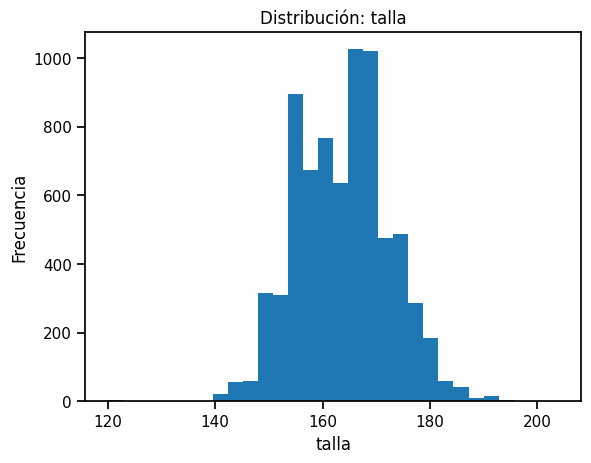

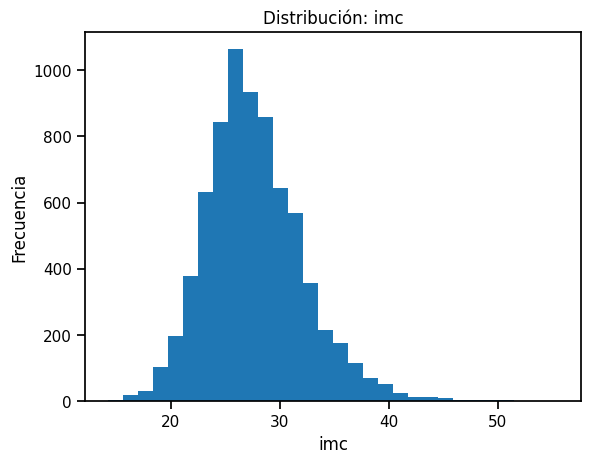

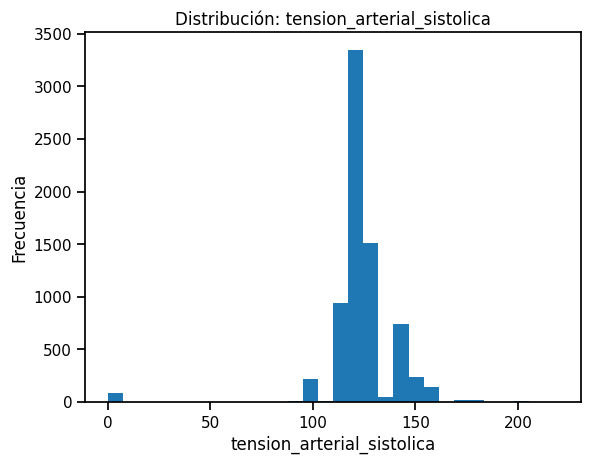

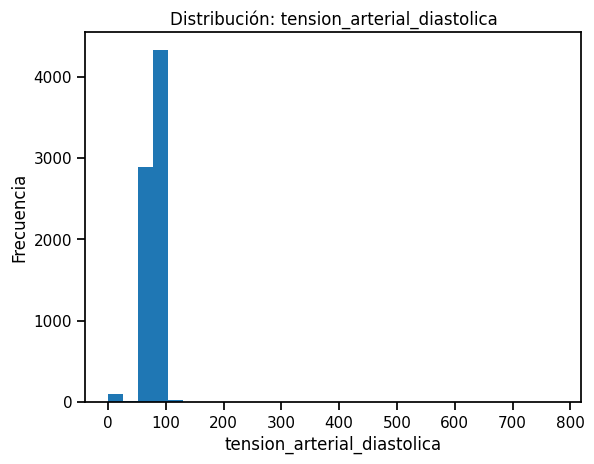

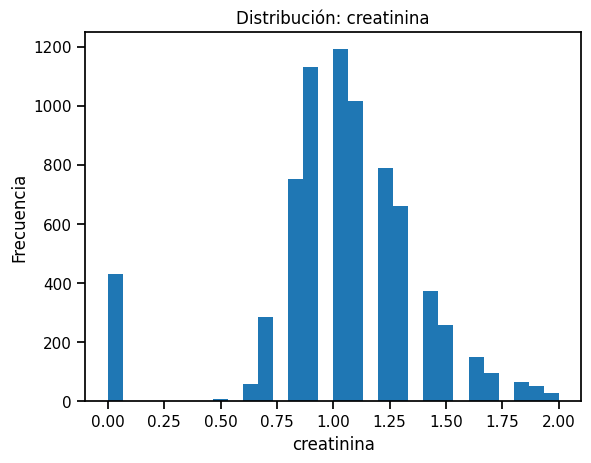

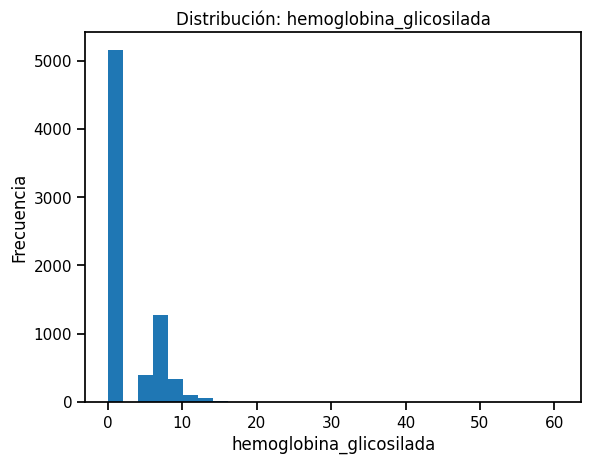

In [30]:
#Distribución de variables númericas

num_cols = df.select_dtypes(include=["number"]).columns.tolist()
excluir_cols = ["id_usuario", "municipio_divipola", "longitud","latitud", "etiologia_erc",
                "perimetro_abdominal","riesgo_cardiovascular","riesgo_diabetes","riesgo_cronico"]
num_cols_validas = [c for c in num_cols if c not in excluir_cols]

for col in num_cols_validas[:8]:
    plt.figure()
    plt.hist(df[col].dropna(), bins=30)
    plt.title(f"Distribución: {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()

In [31]:
### Fase II — Preparación y Preprocesamiento

# edad, hta (0/1), diabetes (0/1), dislipidemia (0/1), obesidad (0/1)

required = ["edad", "hta", "diabetes", "dislipidemia", "obesidad"]
missing_req = [c for c in required if c not in df.columns]
print("Faltan:", missing_req)


Faltan: ['hta', 'diabetes', 'obesidad']
